In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the existing inventory dataset
inventory_df = pd.read_excel("Inventory Dataset.xlsx")

# Read the new inventory dataset
new_inventory_df = pd.read_excel("New Inventory.xlsx")

# Concatenate the datasets
result_df = pd.concat([inventory_df, new_inventory_df.rename(
    columns={'Inventory Receive': 'Date', 'Total Item Qty': 'Inventory'})], ignore_index=True)

# Convert 'Date' column to datetime type
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Create a 'Week' column for grouping
result_df['Week'] = result_df['Date'] - pd.to_timedelta(result_df['Date'].sub(result_df['Date'].min()).dt.days % 7, unit='d')

# Pivot the DataFrame to get weekly columns
pivot_df = result_df.pivot_table(index='Item Number', columns='Week', values='Inventory', aggfunc='sum', fill_value=0)


# Reindex the DataFrame to include all dates in the date_range
date_range = pd.date_range(start=result_df['Date'].min(), end=result_df['Date'].max() + pd.DateOffset(weeks=1), freq='7D')
pivot_df = pivot_df.reindex(columns=date_range, fill_value=0)

# Calculate the cumulative sum
cumulative_df = pivot_df.cumsum(axis=1)

# Display the result
print(cumulative_df)

             2023-06-17  2023-06-24  2023-07-01  2023-07-08  2023-07-15  \
Item Number                                                               
064-01-0003           0           0           0           0           0   
064-01-0005           0           0           0           0           0   
064-01-0006          10          10          10          10          10   
064-01-0012           0           0           0           0           0   
064-01-0013           0           0           0           0           0   
...                 ...         ...         ...         ...         ...   
064-18-9884       12419       12419       12419       12419       12419   
064-18-9904           0           0           0           0           0   
064-18-9909          12          12          12          12          12   
064-18-9938        2736        2736        2736        5500        5500   
064-18-9962          19          19          19          19          19   

             2023-07-22 

In [7]:
cumulative_df.to_excel('output.xlsx', sheet_name='Sheet1')

# Display a message indicating that the data has been saved
print("Data has been saved to 'output.xlsx'")

Data has been saved to 'output.xlsx'


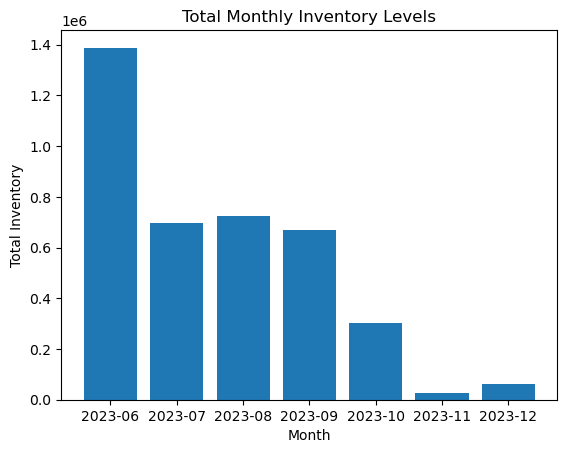

In [6]:
# Group by month and sum the inventory
monthly_inventory = result_df.groupby(result_df['Date'].dt.to_period("M"))['Inventory'].sum()

# Plot the bar chart
plt.bar(monthly_inventory.index.astype(str), monthly_inventory)
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.title('Total Monthly Inventory Levels')
plt.show()